<a href="https://colab.research.google.com/github/nayyen/NayHana-FinalProject/blob/main/Proyek_Akhir_Fundamen_Sains_Data_NayHana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Proyek Akhir Fundamen Sains Data**


---


**Judul:** Prediksi Spending Segment (Whale vs Non-Whale) pada Mobile Game Free-to-Play


**Anggota Kelompok:**
1. Nayla Raihaanah Nabilah Hakim (24523010)

2. Raihana Salwa Hafizhah (24523072)

# 1. **DATA COLLECTION**


---


**Penjelasan Konteks Bisnis:**

Masalah utama dalam industri game free-to-play adalah rendahnya tingkat konversi pemain gratis menjadi pemain berbayar. Mengingat berlakunya Hukum Pareto (80/20), di mana sebagian besar pendapatan hanya dihasilkan oleh sekelompok kecil pemain (Whales), perusahaan perlu mengidentifikasi kelompok ini secara dini agar strategi pemasaran dan retensi dapat lebih terarah dan efisien.

Dataset yang digunakan dalam penelitian ini diperoleh dari repositori publik Kaggle yang mencakup data perilaku transaksi dan aktivitas sesi pemain. Dataset ini terdiri dari 1.000 baris data dan 13 kolom, yang merepresentasikan karakteristik pemain dalam periode tertentu.

Data ini relevan untuk dianalisis karena mencakup metrik perilaku inti seperti frekuensi bermain, durasi sesi, dan nominal transaksi, yang merupakan indikator utama dalam mengukur nilai ekonomi pelanggan (Customer Lifetime Value). Melalui dataset ini, diharapkan dapat dibangun model klasifikasi yang mampu membedakan pemain Whale dan Non-Whale berdasarkan pola perilaku mereka.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

url = 'https://github.com/nayyen/NayHana-FinalProject/raw/refs/heads/main/mobile_game_inapp_purchases.csv'

# Load dataset
df = pd.read_csv(url)

# Menampilkan informasi dasar
print("--- 5 Baris Pertama Data ---")
display(df.head())

print("\n--- Informasi Struktur Data ---")
df.info()

print("\n--- Deskripsi Statistik Data ---")
display(df.describe())

--- 5 Baris Pertama Data ---


,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05



--- Informasi Struktur Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Country                        2964 non-null   object 
 4   Device                         2964 non-null   object 
 5   GameGenre                      2964 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            2888 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDat

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall
count,2964.000000,3024.000000,3024.000000,2888.000000,2888.000000
mean,33.533738,10.074735,20.073978,102.582864,15.384003
std,11.992258,3.115863,8.585208,454.339708,8.946191
min,13.000000,1.000000,5.010000,0.000000,0.000000
25%,23.000000,8.000000,12.680000,5.987500,8.000000
50%,33.000000,10.000000,20.315000,11.975000,16.000000
75%,44.000000,12.000000,27.420000,17.762500,23.000000
max,54.000000,22.000000,34.990000,4964.450000,30.000000


# 2. **PRE-PROCESSING**


---



**Penjelasan Teknis:**
Tahap pre-processing dilakukan untuk memastikan kualitas dan integritas data sebelum masuk ke tahap pemodelan, sehingga model yang dibangun dapat bekerja secara optimal dan menghasilkan prediksi yang lebih akurat.

**Imputasi Missing Value:**
Nilai kosong pada fitur InAppPurchaseAmount diisi dengan nilai 0. Dalam konteks game free-to-play, mayoritas pemain merupakan pemain non-berbayar. Oleh karena itu, nilai transaksi yang kosong secara logis merepresentasikan bahwa pemain tersebut tidak melakukan pembelian sama sekali. Penggunaan nilai rata-rata (mean) berpotensi menimbulkan bias berupa “pembelian semu” pada pemain gratisan, sementara penggunaan nilai maksimum dapat menciptakan “Whale buatan” yang tidak mencerminkan kondisi data sebenarnya. Pendekatan ini dipilih untuk menjaga distribusi data asli yang bersifat positively skewed (condong ke arah nilai rendah).

**Encoding Target:**
Variabel target SpendingSegment diubah menjadi format biner, di mana kelas Whale direpresentasikan dengan nilai 1, sedangkan kategori lainnya (Minnow, Dolphin, dan sebagainya) direpresentasikan dengan nilai 0. Transformasi ini dilakukan untuk menyesuaikan format data dengan kebutuhan algoritma klasifikasi biner.

**StandardScaler:**
Meskipun algoritma Decision Tree tidak sensitif terhadap skala data, proses standardisasi tetap diterapkan untuk menjaga konsistensi pipeline data dan memudahkan interpretasi serta perbandingan antar fitur numerik yang memiliki rentang nilai berbeda, seperti jumlah sesi permainan dan nominal transaksi.


In [13]:
# 1. Cek missing value
print("Missing values sebelum pre-processing:\n", df.isnull().sum())

# 2. Imputasi nilai 0 pada InAppPurchaseAmount
df['InAppPurchaseAmount'] = df['InAppPurchaseAmount'].fillna(0)

# 3. Encoding target menjadi biner (1: Whale, 0: Non-Whale)
df['Target'] = df['SpendingSegment'].apply(lambda x: 1 if x == 'Whale' else 0)

# 4. Feature Selection awal untuk X dan y
X = df[['InAppPurchaseAmount', 'SessionCount', 'AverageSessionLength']]
y = df['Target']

# 5. StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nMissing values setelah pre-processing:", df['InAppPurchaseAmount'].isnull().sum())
print("Distribusi Target (1=Whale, 0=Non-Whale):\n", y.value_counts())

Missing values sebelum pre-processing:
 UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64

Missing values setelah pre-processing: 0
Distribusi Target (1=Whale, 0=Non-Whale):
 Target
0    2956
1      68
Name: count, dtype: int64


# 3. **EDA (EXPLORATORY DATA ANALYSIS)**


---


**Penjelasan EDA:**
Tahap Exploratory Data Analysis (EDA) dilakukan untuk memahami karakteristik dasar dataset serta memvalidasi asumsi bisnis yang telah ditetapkan sebelumnya, khususnya terkait ketidakseimbangan kelas antara pemain Whale dan Non-Whale serta pola distribusi pengeluaran pemain.

Melalui analisis visual, EDA digunakan untuk mengidentifikasi perbedaan pola perilaku antara kedua kelompok tersebut, seperti frekuensi bermain, durasi sesi, dan nominal transaksi. Visualisasi juga membantu dalam melihat apakah terdapat tingkat separasi yang cukup jelas antara pemain Whale dan Non-Whale berdasarkan fitur-fitur yang dipilih, sehingga dapat menjadi dasar dalam pemilihan algoritma klasifikasi yang digunakan pada tahap pemodelan.

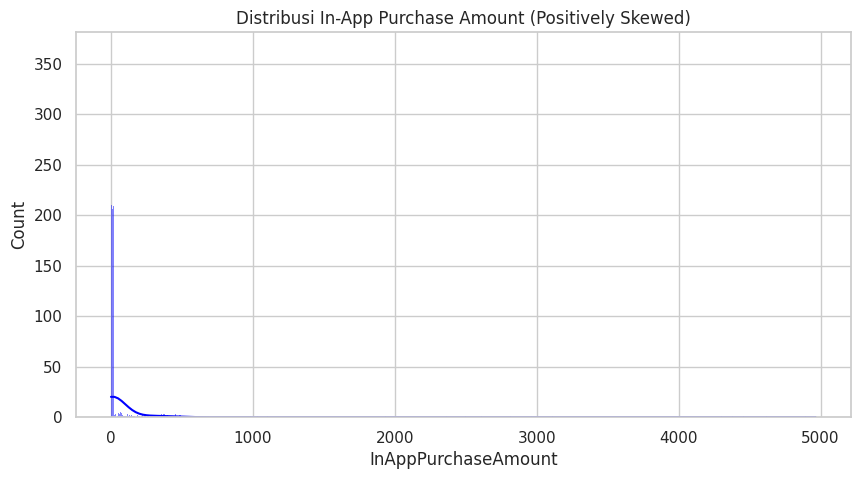

/tmp/ipython-input-1411202191.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='viridis')


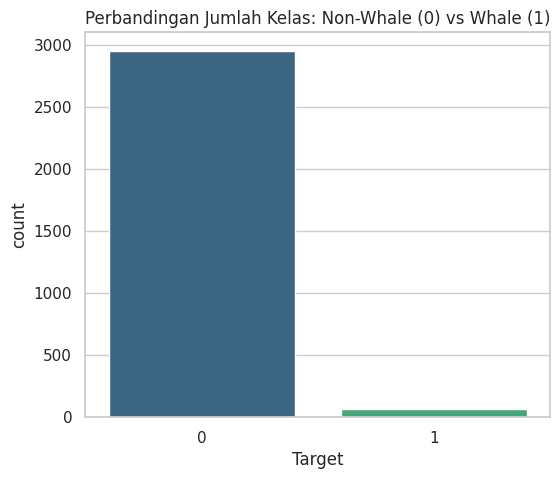

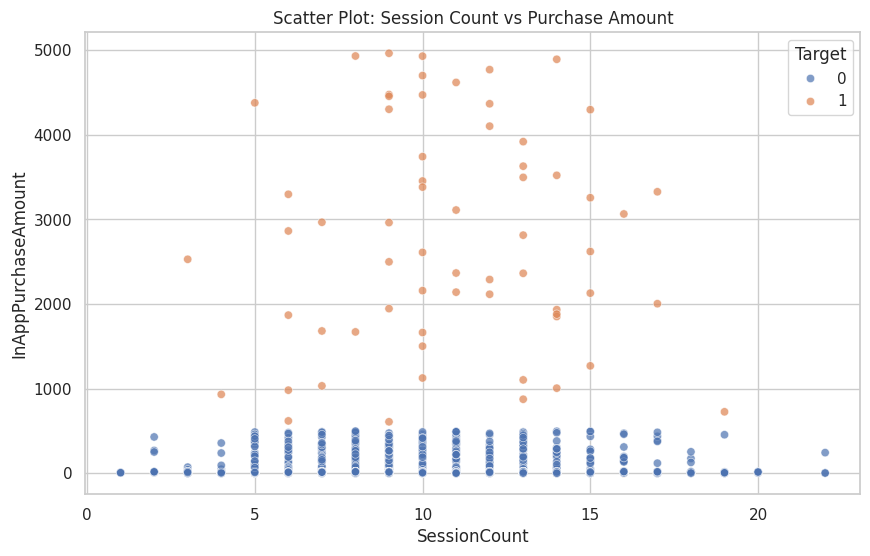

In [14]:
# Set gaya visualisasi
sns.set(style="whitegrid")

# 1. Visualisasi Distribusi InAppPurchaseAmount
plt.figure(figsize=(10, 5))
sns.histplot(df['InAppPurchaseAmount'], kde=True, color='blue')
plt.title('Distribusi In-App Purchase Amount (Positively Skewed)')
plt.show()

# 2. Perbandingan Jumlah Whale vs Non-Whale
plt.figure(figsize=(6, 5))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Perbandingan Jumlah Kelas: Non-Whale (0) vs Whale (1)')
plt.show()

# 3. Scatter Plot Pola Pemisahan Kelas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SessionCount', y='InAppPurchaseAmount', hue='Target', data=df, alpha=0.7)
plt.title('Scatter Plot: Session Count vs Purchase Amount')
plt.show()

### Interpretasi Visualisasi:

1.  **Distribusi InAppPurchaseAmount**: Histogram menunjukkan bahwa sebagian besar pemain memiliki nilai pembelian dalam aplikasi yang rendah atau bernilai nol, dengan ekor panjang di sisi kanan distribusi. Pola ini mengindikasikan bahwa data pengeluaran bersifat positively skewed, di mana hanya sebagian kecil pemain yang memiliki nilai pembelian sangat tinggi. Temuan ini mengonfirmasi karakteristik umum pada game free-to-play, di mana sebagian besar pendapatan berasal dari kelompok kecil pemain bernilai tinggi (Whales).

2.  **Perbandingan Jumlah Whale vs Non-Whale**: Visualisasi count plot secara jelas menunjukkan adanya ketidakseimbangan kelas (class imbalance) yang signifikan. Jumlah pemain Non-Whale (0) jauh lebih besar dibandingkan dengan pemain Whale (1). Kondisi ini menegaskan bahwa penggunaan metrik evaluasi seperti Recall dan F1-Score pada kelas minoritas menjadi lebih relevan dibandingkan hanya mengandalkan Accuracy, serta perlu dipertimbangkan dalam proses pemodelan.

3.  **Scatter Plot: Session Count vs Purchase Amount**: Scatter plot memperlihatkan hubungan antara jumlah sesi bermain (SessionCount) dan nominal pembelian (InAppPurchaseAmount) yang diwarnai berdasarkan segmen target. Terlihat bahwa pemain Whale cenderung terkonsentrasi pada area dengan nilai SessionCount dan InAppPurchaseAmount yang lebih tinggi, sementara pemain Non-Whale tersebar pada area dengan nilai yang lebih rendah. Pola ini mengindikasikan adanya perbedaan perilaku yang cukup jelas antar segmen, serta mendukung asumsi bahwa fitur-fitur tersebut memiliki potensi yang baik dalam membedakan pemain Whale dan Non-Whale pada tahap klasifikasi.

# 4. **FEATURE SELECTION**


---


**Penjelasan Akademik:** Pemilihan fitur dilakukan secara terarah untuk meminimalkan noise dan meningkatkan performa model, dengan mempertimbangkan relevansi fitur terhadap tujuan klasifikasi serta kestabilan model. Pendekatan pemilihan fitur dilakukan melalui tiga aspek utama, yaitu domain knowledge, metode statistik, dan karakteristik model yang digunakan.

**Domain Knowledge (Prinsip RFM):** Pemilihan fitur mengadopsi kerangka kerja Recency, Frequency, dan Monetary (RFM) yang umum digunakan dalam analisis perilaku pelanggan. Dalam konteks ini, SessionCount merepresentasikan aspek Frequency, yaitu seberapa sering pemain berinteraksi dengan game, sementara InAppPurchaseAmount merepresentasikan aspek Monetary, yaitu nilai ekonomi yang dihasilkan oleh pemain. Kedua fitur ini dipilih karena secara konseptual memiliki hubungan langsung dengan segmentasi nilai pelanggan.

**Filter Method:** Berdasarkan analisis korelasi, fitur-fitur yang digunakan memiliki hubungan yang signifikan terhadap variabel target tanpa menunjukkan adanya gejala multikolinearitas. Hal ini memastikan bahwa setiap fitur memberikan informasi yang saling melengkapi dan tidak menimbulkan redundansi berlebihan dalam proses pemodelan.

**Feature Importance (Decision Tree):** Algoritma Decision Tree secara internal melakukan pemilihan fitur dengan memprioritaskan fitur yang paling efektif dalam menurunkan tingkat impurity pada setiap proses pemisahan data. Dengan mekanisme ini, fitur yang kurang relevan secara otomatis akan memiliki bobot yang rendah atau tidak digunakan dalam struktur pohon keputusan.

# 5. **MODELING**


---


**Penjelasan Algoritma:** Algoritma Decision Tree Classifier dipilih sebagai model klasifikasi utama karena memiliki sejumlah keunggulan teknis yang sesuai dengan karakteristik data dan tujuan analisis.

**Non-Linearitas:** Pola perilaku pemain dalam game free-to-play cenderung bersifat tidak linear. Sebagai contoh, pemain dapat mulai melakukan pembelian dalam jumlah besar setelah mencapai jumlah sesi tertentu. Decision Tree mampu menangkap hubungan non-linear tersebut tanpa memerlukan asumsi distribusi data tertentu.

**Resistansi terhadap Outlier:** Pemain Whale secara statistik merupakan kelompok minoritas dengan nilai transaksi yang ekstrem. Decision Tree melakukan pemisahan data berdasarkan nilai ambang (threshold), sehingga relatif lebih tahan terhadap pengaruh outlier dibandingkan algoritma berbasis jarak atau rata-rata.

**Interpretabilitas (White-box Model):** Salah satu keunggulan utama Decision Tree adalah sifatnya yang mudah diinterpretasikan. Model ini menghasilkan aturan keputusan yang transparan dan dapat dipahami oleh tim non-teknis, seperti tim bisnis atau pemasaran (misalnya: “Jika jumlah sesi > X dan total pembelian > Y, maka pemain diklasifikasikan sebagai Whale”). Hal ini menjadikan model tidak hanya akurat, tetapi juga praktis untuk pengambilan keputusan strategis.

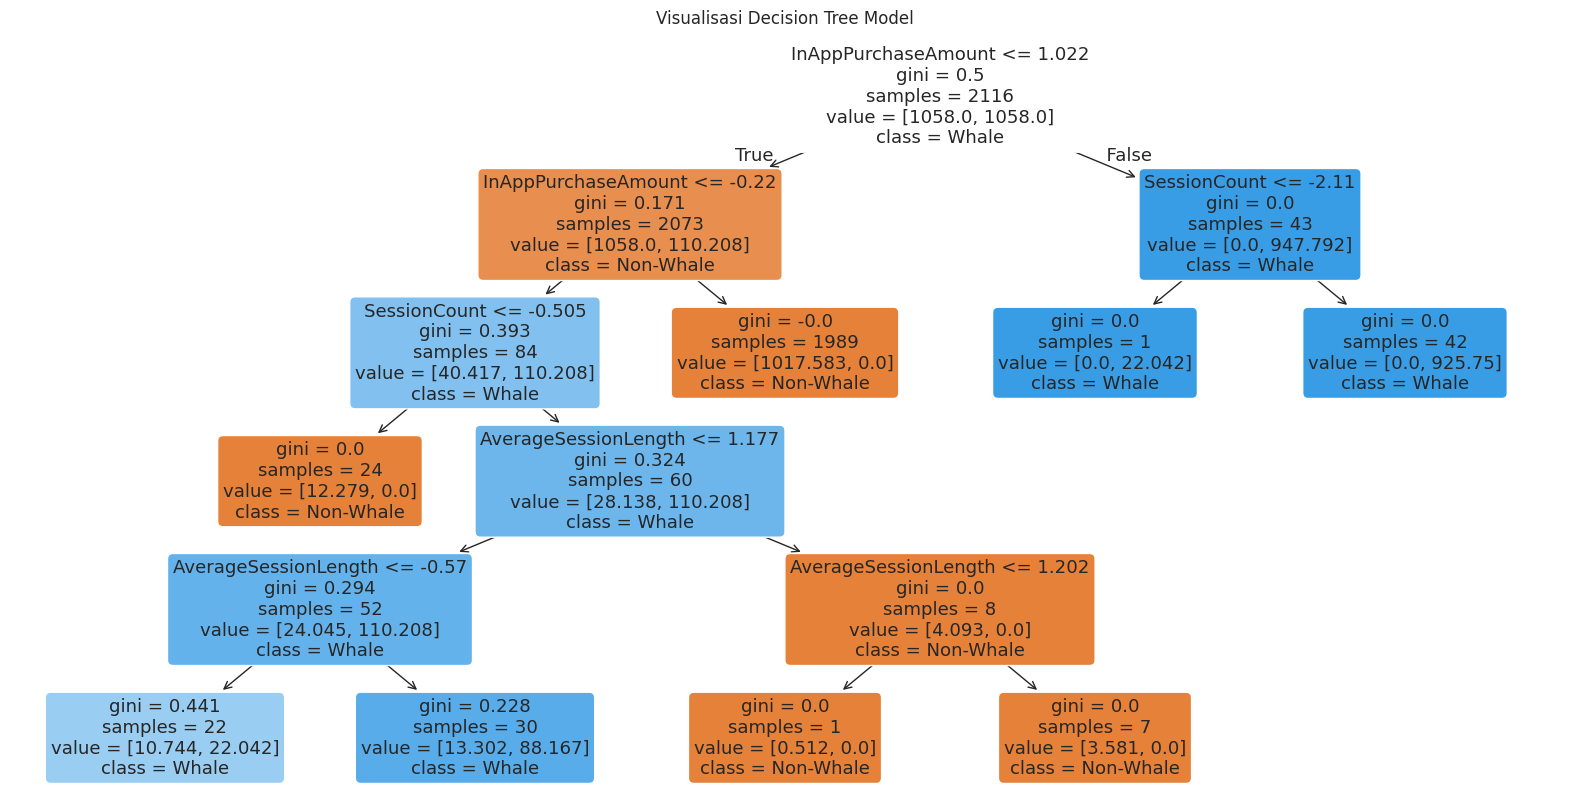

In [15]:
# Split Data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Inisialisasi dan Training Model
# Menggunakan class_weight='balanced' untuk menangani imbalance data
model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
model.fit(X_train, y_train)

# Visualisasi Pohon Keputusan
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Non-Whale', 'Whale'], filled=True, rounded=True)
plt.title("Visualisasi Decision Tree Model")
plt.show()

# 6. **EVALUATION & INTERPRETATION**


---



Confusion Matrix:
[[853  35]
 [  0  20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       888
           1       0.36      1.00      0.53        20

    accuracy                           0.96       908
   macro avg       0.68      0.98      0.76       908
weighted avg       0.99      0.96      0.97       908

ROC-AUC: 1.0
PR-AUC: 1.0


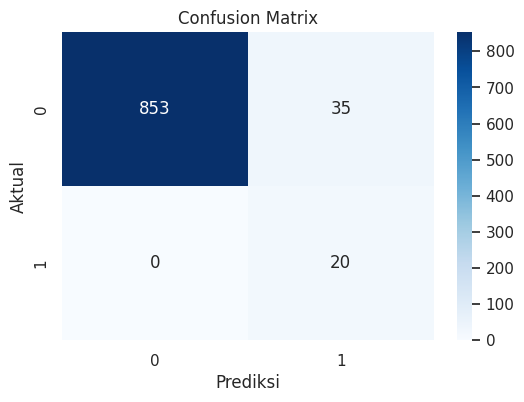

In [16]:
# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriks tambahan untuk data imbalanced
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# **Interpretasi Hasil:**

**Recall & F1-Score:** Dalam kasus ini, Recall merupakan metrik paling kritikal. Jika model gagal mendeteksi Whale (False Negative), perusahaan kehilangan peluang pendapatan yang sangat besar dari penawaran personal yang tidak terkirim. Oleh karena itu, fokus evaluasi diarahkan pada kemampuan model dalam meminimalkan kesalahan False Negative.
Meskipun peningkatan recall dapat menyebabkan bertambahnya False Positive, kondisi ini masih dapat diterima karena biaya kesalahan tersebut relatif lebih kecil dibadingkan kehilangan pemain Whale yang bernilai tinggi.

**Analisis False Negative:** False Negative berarti pemain Whale diprediksi sebagai pemain biasa. Dampak bisnis dari kondisi ini adalah hilangnya potensi Return on Investment (ROI) marketing karena pemain berharga tidak mendapatkan treatment atau penawaran eksklusif yang seharusnya diterima.

**Kritik Metrik Akurasi:** Akurasi tidak dijadikan metrik utama karena dataset pada penelitian ini bersifat tidak seimbang (imbalanced). Model yang hanya memprediksi seluruh pemain sebagai Non-Whale dapat menghasilkan nilai akurasi tinggi, namun gagal total dalam mencapai tujuan bisnis utama, yaitu mengidentifikasi pemain Whale.

**Penanganan Data Imbalaced:**
Untuk mengatasi permasalahan ketidakseimbangan data, model dilatih menggunakan pendekatan class weight, di mana kesalahan prediksi pada kelas Whale diberikan penalti yang lebih besar dibandingkan kelas Non-Whale. Pendekatan ini membuat model lebih sensitif terhadap kelas minoritas tanpa mengubah distribusi data asli.

**Dampak ROI dan Evaluasi Tambahan:**
Selain menggunakan confusion matrix dan classification report, evaluasi model juga dilengkapi dengan matriks ROC-AUC dan PR-AUC untuk memberikan gambaran performa model yang lebih representatif pada kondisi data tidak seimbang. Dengan pendekatan ini, model mampu mendukung tim CRM dalam melakukan intervensi yang lebih tepat sasaran, sehingga biaya promosi dapat dialokasikan secara lebih efisien kepada pemain yang memiliki potensi belanja tinggi.

# 7. **KESIMPULAN AKHIR**


---


# **Ringkasan:**

**Kelayakan Model:** Model Decision Tree layak digunakan sebagai baseline untuk sistem segmentasi otomatis karena memiliki tingkat interpretabilitas yang tinggi melalui aturan if-then, sehingga memudahkan tim bisnis dan CRM dalam memahami dasar pengambilan keputusan model.

**Kelebihan:** Model ini sangat transparan, tidak membutuhkan asumsi distribusi normal, serta efektif dalam memisahkan kelas Whale yang bersifat pencilan (outlier) pada data. Selain itu, penerapan class weight membantu model menjadi lebih sensitif dalam mendeteksi kelas Whale pada kondisi data yang tidak seimbang.

**Keterbatasan:** Decision Tree cenderung mudah mengalami overfitting apabila kedalaman pohon tidak dibatasi, serta sensitif terhadap perubahan kecil pada data latih. Selain itu, peningkatan sensitivitas terhadap kelas Whale dapat menyebabkan bertambahnya false positive, yang perlu dikelola melalui strategi threshold atau evaluasi lanjutan.



In [17]:
# Melihat profil asli seorang Whale di dataset
print(df[df['SpendingSegment'] == 'Whale'][['InAppPurchaseAmount', 'SessionCount']].describe())

       InAppPurchaseAmount  SessionCount
count              68.0000     68.000000
mean             2582.1050     10.926471
std              1453.5994      3.342696
min                 0.0000      3.000000
25%              1623.3250      9.000000
50%              2514.0700     10.500000
75%              3657.8025     13.000000
max              4964.4500     19.000000


**1. InAppPurchaseAmount (Uang yang Dikeluarkan)**

Mean (Rata-rata) = 2582.10: Rata-rata seorang Whale di dataset belanja sekitar $2.582.

50% (Median) = 2514.07: Setengah dari kelompok Whale belanja di atas $2.514.

25% (Batas Bawah) = 1623.32: Bahkan Whale yang "paling miskin" sekalipun (di kuartil bawah) belanja $1.623.




**2. SessionCount (Keaktifan)**

Mean = 10.92: Rata-rata Whale hanya main 11 kali.

Max = 19: Whale yang paling rajin pun hanya main 19 kali.

Kesimpulan Unik: Di dataset ini, menjadi Whale tidak ditentukan oleh seberapa sering dia main (karena 11-19 sesi itu tergolong sedikit), tapi murni karena uangnya yang sangat banyak.

In [18]:
# Melihat profil durasi bermain (AverageSessionLength) khusus untuk Whale
print("--- Statistik Durasi Bermain (Whale) ---")
print(df[df['SpendingSegment'] == 'Whale']['AverageSessionLength'].describe())

print("\n--- Perbandingan dengan Rata-rata Seluruh Pemain ---")
print(f"Rata-rata Durasi Whale: {df[df['SpendingSegment'] == 'Whale']['AverageSessionLength'].mean():.2f} menit")
print(f"Rata-rata Durasi Semua : {df['AverageSessionLength'].mean():.2f} menit")

--- Statistik Durasi Bermain (Whale) ---
count    68.000000
mean     17.931471
std       8.591861
min       5.520000
25%      11.227500
50%      16.200000
75%      24.327500
max      34.620000
Name: AverageSessionLength, dtype: float64

--- Perbandingan dengan Rata-rata Seluruh Pemain ---
Rata-rata Durasi Whale: 17.93 menit
Rata-rata Durasi Semua : 20.07 menit


**1. Durasi Bermain Bukan Penentu:** Rata-rata durasi Whale (17,93 menit) ternyata lebih rendah dibandingkan rata-rata pemain secara keseluruhan (20,07 menit). Ini artinya, seseorang tidak harus bermain lama untuk menjadi "Sultan".

**2. Karakteristik "Power User":** Para Whale di dataset kemungkinan besar adalah tipe pemain yang sibuk secara finansial. Mereka masuk ke game, melakukan pembelian besar, bermain sebentar (mungkin untuk pamer atau menggunakan item baru), lalu keluar. Mereka tidak melakukan "grinding" (bermain berjam-jam untuk mendapatkan sesuatu secara gratis).

**3. Strategi Marketing (Dampak Bisnis):** Tim CRM tidak boleh hanya menargetkan orang yang bermain lama. Jika hanya menargetkan pemain dengan durasi tinggi, tim marketing justru akan melewatkan para Whale yang durasi mainnya justru di bawah rata-rata.



---
**Kesimpulan :** Analisis komparatif menunjukkan adanya anomali pada fitur AverageSessionLength. Kelompok Whale memiliki rata-rata durasi sesi sebesar 17,93 menit, yang secara signifikan lebih rendah dibandingkan rata-rata populasi pemain (20,07 menit). Hal ini mengindikasikan bahwa perilaku belanja 'Whale' tidak berkorelasi positif dengan durasi bermain. Sebaliknya, segmen ini menunjukkan pola 'Efficiency Spending', di mana nilai ekonomi yang mereka berikan tidak bergantung pada intensitas waktu bermain (grinding), melainkan pada daya beli moneter yang ekstrem.


# **Mengimplementasikan model menggunakan Gradio**

# **1.Model & Scaler Persistence (Penyimpanan Model)**

**Penjelasan Singkat:** Langkah ini berfungsi untuk membekukan atau menyimpan "Otak" AI (Model) dan "Penerjemah" Data (Scaler) ke dalam file fisik berformat .pkl.

**Kenapa Scaler harus disimpan?** Scaler sangat krusial karena ia menyimpan "standar ukuran" yang dipelajari saat training. Ibarat AI adalah orang asing yang hanya mengerti satuan Meter, maka Scaler adalah penerjemah yang mengubah angka input dari pengguna (seperti 3.500 USD) menjadi "bahasa" (skala) yang dimengerti AI. Tanpa Scaler yang sama, AI akan bingung dan memberikan prediksi yang salah meskipun modelnya sudah pintar.

**Tujuannya:**

1. Efisiensi: Agar model bisa langsung digunakan di aplikasi Gradio tanpa perlu proses training ulang yang memakan waktu.

2. Konsistensi: Menjamin angka yang dimasukkan di aplikasi Gradio dikonversi dengan standar yang persis sama seperti saat model dilatih, sehingga hasil prediksi tetap akurat.


In [19]:
import pickle

# Kita simpan model (Decision Tree) dan Scaler (Normalisasi)
with open('model_whale.pkl', 'wb') as f:
    pickle.dump(model, f) # 'model' adalah nama variabel model Anda

with open('scaler_whale.pkl', 'wb') as f:
    pickle.dump(scaler, f) # 'scaler' adalah nama variabel StandardScaler Anda

print("Model dan Scaler berhasil disimpan!")

Model dan Scaler berhasil disimpan!


#### **Catatan:**
Perintah `pip install --upgrade gradio` digunakan untuk memperbarui library Gradio ke versi terbaru.
Ini biasanya diperlukan jika ada error yang berhubungan dengan versi Gradio yang tidak kompatibel atau sudah usang.

In [20]:
pip install --upgrade gradio

# **2.Deployment & Interface (Dashboard Interaktif Gradio)**

**Penjelasan:** Bagian ini membangun antarmuka web profesional menggunakan Gradio. Sistem ini memanggil kembali "Otak" (model_whale.pkl) dan "Kacamata" (scaler_whale.pkl) yang sudah disimpan sebelumnya.

**💡 Catatan Efisiensi:** Karena model sudah disimpan dalam format .pkl, kita tidak perlu lagi menjalankan proses training dari awal. Cukup pastikan file .pkl ada di folder sesi, lalu jalankan bagian ini untuk melakukan prediksi instan dan melihat rekomendasi strategi bisnis secara real-time.


In [21]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle

# =====================================================
# 1. LOAD MODEL & SCALER (TETAP SAMA)
# =====================================================
def load_resources():
    try:
        with open('model_whale.pkl', 'rb') as f:
            m = pickle.load(f)
        with open('scaler_whale.pkl', 'rb') as f:
            s = pickle.load(f)
        return m, s
    except FileNotFoundError:
        return None, None

model_loaded, scaler_loaded = load_resources()

# =====================================================
# 2. FUNGSI PREDIKSI & ANALISIS (TETAP SAMA)
# =====================================================
def prediksi_lengkap(purchase, sessions, length):
    if model_loaded is None:
        return "Error: File model tidak ditemukan. Pastikan sudah menjalankan Step 1.", ""

    # Pre-processing
    data = pd.DataFrame([[purchase, sessions, length]],
                        columns=['InAppPurchaseAmount', 'SessionCount', 'AverageSessionLength'])
    data_scaled = scaler_loaded.transform(data)

    # Prediksi Label (0 atau 1)
    hasil_prediksi = model_loaded.predict(data_scaled)[0]

    # Output 1: Status Segmen (Teks Tegas)
    status = "🐋 WHALE (High-Value Player)" if hasil_prediksi == 1 else "🎮 NON-WHALE (Regular Player)"

    # Output 2: Narasi Strategi Bisnis
    if hasil_prediksi == 1:
        rekomendasi = (
            "### 💎 ANALISIS STRATEGI: WHALE\n"
            "**Karakteristik:** Kontribusi ekonomi sangat tinggi (High Monetary).\n"
            "**Aksi Marketing:**\n"
            "* Berikan layanan **Customer Support Prioritas**.\n"
            "* Tawarkan **Item Eksklusif** yang tidak tersedia untuk pemain biasa.\n"
            "* Undang ke dalam program **Loyalty VIP** untuk mencegah mereka berhenti bermain (Churn)."
        )
    else:
        rekomendasi = (
            "### 🎯 ANALISIS STRATEGI: NON-WHALE\n"
            "**Karakteristik:** Pemain aktif namun belum melakukan transaksi besar.\n"
            "**Aksi Marketing:**\n"
            "* Tawarkan **Starter Pack** dengan harga terjangkau ($0.99) untuk memancing transaksi pertama.\n"
            "* Berikan reward harian untuk menjaga **Daily Engagement**.\n"
            "* Fokuskan pada konversi menjadi 'Dolphin' (pembeli tingkat menengah)."
        )

    return status, rekomendasi

# =====================================================
# 3. UI GRADIO (FIXED VERSION)
# =====================================================
# Mendefinisikan tema secara terpisah untuk menghindari warning
my_theme = gr.themes.Soft(primary_hue="blue", secondary_hue="indigo")

with gr.Blocks(theme=my_theme) as demo:

    # --- SECTION 1: HERO LANDING PAGE ---
    # Diganti dari gr.Container ke gr.Column agar kompatibel
    with gr.Column():
        gr.Markdown(
            """
            # 🚀 AI Player Profiling Suite
            ## Optimasi Pendapatan Game melalui Segmentasi 'Whale' Berbasis Data

            Selamat datang di sistem pendukung keputusan cerdas yang dirancang untuk membantu tim Marketing dan Product Manager memahami perilaku pemain secara mendalam.
            """
        )

        with gr.Row():
            with gr.Column():
                gr.Markdown(
                    """
                    ### 🎯 Tujuan Proyek
                    Mengidentifikasi pemain kategori **Whale** (Sultan) secara akurat menggunakan algoritma *Decision Tree*. Dengan akurasi model yang tinggi, tim dapat mengalokasikan sumber daya marketing secara lebih efektif.
                    """
                )
            with gr.Column():
                gr.Markdown(
                    """
                    ### 📊 Ringkasan Dataset
                    Berdasarkan eksplorasi data, segmen Whale merupakan kelompok eksklusif yang menyumbang pendapatan terbesar dengan ambang batas pembelian rata-rata di atas **$1.600 USD**.
                    """
                )

    gr.HTML("<hr>")

    # --- SECTION 2: INFORMASI MODEL & DATA ---
    with gr.Accordion("🔍 Lihat Profiling Data Whale (Insights)", open=False):
        gr.Markdown(
            """
            | Parameter | Rata-rata Pemain Whale |
            | :--- | :--- |
            | **Total Pembelian** | > $2,500 USD |
            | **Jumlah Sesi** | 10 Sesi |
            | **Durasi Per Sesi** | ~17.9 Menit |

            *Catatan: Whale cenderung memiliki durasi bermain yang efisien namun dengan daya beli yang sangat tinggi.*
            """
        )

    gr.Markdown("## 🛠️ Dashboard Analisis Prediksi")
    gr.Markdown("Masukkan data perilaku pemain di bawah ini untuk mendapatkan hasil klasifikasi dan rekomendasi strategi.")

    # --- SECTION 3: CORE PREDICTION AREA (KODE ASLI KAMU) ---
    with gr.Row():
        # Kolom Kiri: Input
        with gr.Column(variant="panel"):
            gr.Markdown("### 📥 Parameter Perilaku")
            in_purchase = gr.Number(label="Total Belanja (USD)", value=0, info="Total akumulasi pembelian sejak pemain bergabung (Monetary).")
            in_sessions = gr.Slider(label="Jumlah Sesi", minimum=0, maximum=50, step=1, value=10, info="Total berapa kali pemain membuka aplikasi sejak instalasi (Frequency).")
            in_length = gr.Number(label="Rata-rata Durasi (Menit)", value=0, info="Rata-rata waktu yang dihabiskan pemain dalam satu kali sesi main (Duration).")

            gr.Examples(
                examples=[
                    [3500, 12, 18],  # Tipikal Whale
                    [15, 40, 60],    # Tipikal Gamer Gratisan
                    [250, 5, 10],    # Tipikal Pemain Baru
                    [1650, 5, 14]
                ],
                inputs=[in_purchase, in_sessions, in_length],
                label="Klik Contoh Skenario:"
            )

            btn = gr.Button("🚀 JALANKAN ANALISIS", variant="primary")

        # Kolom Kanan: Output
        with gr.Column(variant="panel"):
            gr.Markdown("### 📊 Hasil Prediksi Model")
            out_label = gr.Textbox(label="Segmen Terdeteksi")
            out_insight = gr.Markdown("*Hasil analisis akan muncul di sini...*")
            gr.Markdown(
                """
                > **Catatan Interpretasi:**
                > Model Decision Tree memprioritaskan nilai **Total Pembelian**.
                > Berdasarkan data historis, segmen Whale umumnya memiliki pembelian > $1.600 meskipun frekuensi sesi cenderung rendah (di bawah 20 sesi).
                """
            )

    # Footer
    gr.Markdown(
        """
        ---
        **Project Akhir Fundamen Sains Data**
        **Team NayHana** | 2024 Analysis Report | Model: Decision Tree Classifier
        """
    )

    # Mapping Fungsi (TETAP SAMA)
    btn.click(
        fn=prediksi_lengkap,
        inputs=[in_purchase, in_sessions, in_length],
        outputs=[out_label, out_insight]
    )

# 4. LAUNCH
demo.launch(share=True)

/tmp/ipython-input-3023023896.py:67: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  with gr.Blocks(theme=my_theme) as demo:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://73b753d3ad6db79dcd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
